In [1]:

# Now install the required libraries
!pip install daam==0.2.0 diffusers==0.21.2 transformers==4.30.2 torch torchvision matplotlib ftfy scipy
!pip install --upgrade huggingface_hub==0.14.1
!pip install git+https://github.com/openai/CLIP.git


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip uninstall diffusers -y
!pip uninstall huggingface_hub -y


Found existing installation: diffusers 0.21.2
Uninstalling diffusers-0.21.2:
  Successfully uninstalled diffusers-0.21.2
Found existing installation: huggingface-hub 0.14.1
Uninstalling huggingface-hub-0.14.1:
  Successfully uninstalled huggingface-hub-0.14.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install diffusers==0.21.2
!pip install daam
!pip install huggingface_hub==0.14.1


  Using cached diffusers-0.21.2-py3-none-any.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.6/447.6 kB 8.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.30.2 which is incompatible.
  Using cached huggingface_hub-0.14.1-py3-none-any.whl.metadata (7.6 kB)
Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.26.3
    Uninstalling huggingface-hub-0.26.3:
      Successfully uninstalled huggingface-hub-0.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.7.0 requires huggingface-hub>=0.25.1, but you have huggingface-h

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Original image saved as PNG: /content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/original_image.png


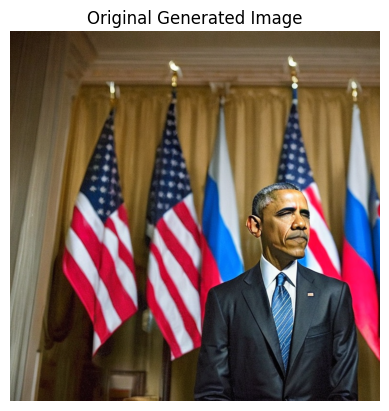

DAAM heatmap statistics saved as text file: /content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/daam_heatmap_stats.txt
DAAM Heatmap - Min: 0.13229654729366302, Max: 1.2452486753463745, Mean: 0.2408609390258789


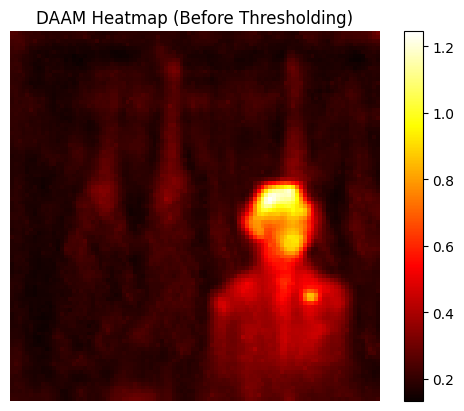

DAAM heatmap before thresholding saved as SVG: /content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/daam_heatmap_before_threshold.svg
DAAM binary mask saved as PNG: /content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/daam_mask.png


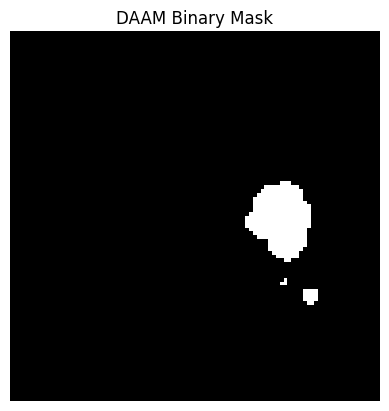

DAAM overlay image saved as PNG: /content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/image_with_overlay.png
DAAM overlay image saved as SVG: /content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/image_with_overlay.svg


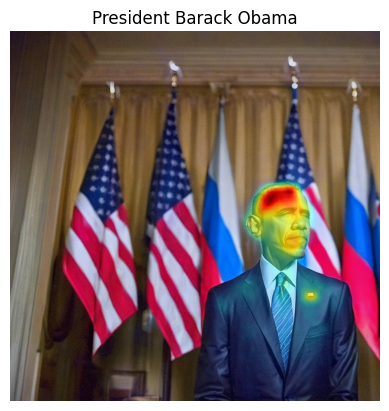

In [8]:
from daam import trace, set_seed
from diffusers import DiffusionPipeline
import torch
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
from datetime import datetime

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set up the base path in Google Drive
base_output_dir = "/content/drive/MyDrive/Generated_Prompts"
os.makedirs(base_output_dir, exist_ok=True)

# Load the Stable Diffusion model and move it to GPU
model_id = 'stabilityai/stable-diffusion-2-1'
pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to('cuda')

def generate_and_save_images_with_daam(prompt, word_to_trace, seed=0, num_inference_steps=50, threshold=0.6):
    """
    Generate an image with Stable Diffusion, trace attention on a specific word or phrase,
    save both the original image and the DAAM overlay image in PNG and SVG formats,
    and save a binary DAAM mask for IoU comparison.

    Parameters:
        prompt (str): The text prompt for image generation.
        word_to_trace (str): The word or phrase to trace attention on.
        seed (int): The random seed for reproducibility.
        num_inference_steps (int): Number of denoising steps for the pipeline.
        threshold (float): Threshold for binarizing the DAAM mask.
    """
    # Create a unique folder for `word_to_trace` in Google Drive
    trace_dir_name = word_to_trace.replace(" ", "_")  # Replace spaces with underscores for folder naming
    prompt_dir = os.path.join(base_output_dir, trace_dir_name)
    os.makedirs(prompt_dir, exist_ok=True)

    # Set the seed for reproducibility
    gen = set_seed(seed)

    # Use DAAM to trace attention and generate an image
    with torch.no_grad():
        with trace(pipe) as tc:
            out = pipe(prompt, num_inference_steps=num_inference_steps, generator=gen)
            generated_image = out.images[0]

            # Save and show the original image without DAAM overlay
            original_png_path = os.path.join(prompt_dir, "original_image.png")
            generated_image.save(original_png_path)
            print(f"Original image saved as PNG: {original_png_path}")
            plt.imshow(generated_image)
            plt.title("Original Generated Image")
            plt.axis('off')
            plt.show()

            # Compute the global heat map and word-specific heat map
            heat_map = tc.compute_global_heat_map()
            word_heat_map = heat_map.compute_word_heat_map(word_to_trace)
            daam_heatmap = word_heat_map.heatmap.cpu().numpy()  # Get DAAM heatmap as a NumPy array

            # Save DAAM heatmap statistics to a text file
            heatmap_stats_path = os.path.join(prompt_dir, "daam_heatmap_stats.txt")
            with open(heatmap_stats_path, "w") as file:
                file.write(f"DAAM Heatmap Statistics:\n")
                file.write(f"Min: {daam_heatmap.min()}\n")
                file.write(f"Max: {daam_heatmap.max()}\n")
                file.write(f"Mean: {daam_heatmap.mean()}\n")
            print(f"DAAM heatmap statistics saved as text file: {heatmap_stats_path}")
            print(f"DAAM Heatmap - Min: {daam_heatmap.min()}, Max: {daam_heatmap.max()}, Mean: {daam_heatmap.mean()}")

            # Display and save DAAM heatmap before thresholding
            heatmap_svg_path = os.path.join(prompt_dir, "daam_heatmap_before_threshold.svg")
            fig, ax = plt.subplots()
            cax = ax.imshow(daam_heatmap, cmap='hot')
            fig.colorbar(cax)
            plt.title("DAAM Heatmap (Before Thresholding)")
            plt.axis('off')
            fig.savefig(heatmap_svg_path, format="svg", bbox_inches='tight', pad_inches=0)
            plt.show()
            plt.close(fig)
            print(f"DAAM heatmap before thresholding saved as SVG: {heatmap_svg_path}")

            # Threshold the heatmap to create a binary DAAM mask
            daam_binary_mask = (daam_heatmap >= threshold).astype(np.uint8) * 255  # Convert to binary and scale to 0/255

            # Save and show the DAAM binary mask for IoU comparison
            daam_mask_path = os.path.join(prompt_dir, "daam_mask.png")
            cv2.imwrite(daam_mask_path, daam_binary_mask)
            print(f"DAAM binary mask saved as PNG: {daam_mask_path}")
            plt.imshow(daam_binary_mask, cmap='gray')
            plt.title("DAAM Binary Mask")
            plt.axis('off')
            plt.show()

            # Plot the overlayed image
            fig, ax = plt.subplots()
            ax.imshow(generated_image)
            word_heat_map.plot_overlay(generated_image, ax=ax)  # Add overlay to the image
            plt.axis('off')

            # Define filenames for DAAM overlay images
            overlay_png_path = os.path.join(prompt_dir, "image_with_overlay.png")
            overlay_svg_path = os.path.join(prompt_dir, "image_with_overlay.svg")

            # Save and show the DAAM overlay image in PNG and SVG formats
            fig.savefig(overlay_png_path, bbox_inches='tight', pad_inches=0)
            fig.savefig(overlay_svg_path, format="svg", bbox_inches='tight', pad_inches=0)
            print(f"DAAM overlay image saved as PNG: {overlay_png_path}")
            print(f"DAAM overlay image saved as SVG: {overlay_svg_path}")
            plt.show()
            plt.close(fig)

# Example usage
prompt = "Outgoing US President Barack Obama stands in a solemn setting, authorizing a strategic response to Russia's 2014 intervention in Ukraine, where Crimea was annexed. The scene captures Obama's decisive expression amid a backdrop of geopolitical tension."
word_to_trace = "President Barack Obama"
generate_and_save_images_with_daam(prompt, word_to_trace)


working till here. using data labeling tolls now,


In [9]:
import xml.etree.ElementTree as ET
import numpy as np
import cv2

def create_mask_from_xml(xml_path, img_shape=(768, 768)):
    """
    Convert XML annotations with bounding boxes from CVAT to a binary mask.

    Parameters:
        xml_path (str): Path to the XML file exported from CVAT.
        img_shape (tuple): The shape of the output mask (height, width).

    Returns:
        np.array: Binary mask where the object is 1 and the background is 0.
    """
    # Initialize an empty binary mask
    mask = np.zeros(img_shape, dtype=np.uint8)

    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Iterate through each box object in the XML
    for obj in root.findall('image/box'):
        label = obj.attrib['label']

        # Parse the coordinates of the bounding box
        xtl = int(float(obj.attrib['xtl']))
        ytl = int(float(obj.attrib['ytl']))
        xbr = int(float(obj.attrib['xbr']))
        ybr = int(float(obj.attrib['ybr']))

        # Set color based on label
        color = 1 if label == "Object" else 0  # 1 for Object, 0 for Background

        # Draw the rectangle on the mask
        cv2.rectangle(mask, (xtl, ytl), (xbr, ybr), color, thickness=-1)  # -1 fills the rectangle

    return mask

# Paths to the XML file and mask output path
xml_path = '/content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/annotations.xml'

# Replace with your XML file path  # Replace with your XML file path

# Create the binary mask from the XML file
binary_mask = create_mask_from_xml(xml_path)

# Optional: Save the binary mask as an image file (e.g., PNG)
cv2.imwrite('/content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/ground_truth_mask.png', binary_mask * 255)  # Save as binary image

print("Ground truth mask created and saved as ground_truth_mask.png")




Ground truth mask created and saved as ground_truth_mask.png


calculate IoU


In [10]:
import cv2
import numpy as np

def load_binary_mask(mask_path, target_shape=None):
    """
    Load a binary mask from a file and resize it if necessary.

    Parameters:
        mask_path (str): Path to the binary mask file (PNG format).
        target_shape (tuple): Optional target shape (height, width) to resize the mask.

    Returns:
        np.array: Binary mask where object pixels are 1 and background pixels are 0.
    """
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    mask = (mask > 0).astype(np.uint8)  # Binarize: 1 for object, 0 for background

    # Resize mask if a target shape is specified
    if target_shape and mask.shape != target_shape:
        mask = cv2.resize(mask, target_shape, interpolation=cv2.INTER_NEAREST)

    return mask

def calculate_iou(daam_mask, ground_truth_mask):
    """
    Calculate the Intersection over Union (IoU) between two binary masks.

    Parameters:
        daam_mask (np.array): Binary mask from DAAM.
        ground_truth_mask (np.array): Ground-truth binary mask from CVAT.

    Returns:
        float: IoU score.
    """
    intersection = np.logical_and(daam_mask, ground_truth_mask).sum()
    union = np.logical_or(daam_mask, ground_truth_mask).sum()
    iou_score = intersection / union if union != 0 else 0
    return iou_score

# Paths to the DAAM and ground-truth masks
daam_mask_path = '/content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/daam_mask.png'
ground_truth_mask_path = '/content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/ground_truth_mask.png'

# Load both masks
target_shape = (512, 512)  # Ensure both masks are the same size
daam_mask = load_binary_mask(daam_mask_path, target_shape=target_shape)
ground_truth_mask = load_binary_mask(ground_truth_mask_path, target_shape=target_shape)

# Calculate IoU
iou_score = calculate_iou(daam_mask, ground_truth_mask)
print(f"IoU Score: {iou_score:.2f}")


IoU Score: 0.61


Generate a Comparison Heatmap

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_and_save_comparison_heatmap(daam_mask, ground_truth_mask, output_dir, base_filename="comparison_heatmap"):
    """
    Plot a heatmap to compare the DAAM and ground-truth masks, and save it as both PNG and SVG files.

    Parameters:
        daam_mask (np.array): Binary DAAM mask.
        ground_truth_mask (np.array): Binary ground-truth mask.
        output_dir (str): Directory to save the SVG and PNG heatmap files.
        base_filename (str): Base filename for the saved files (without extension).
    """
    # Define colors for different regions
    overlap = np.logical_and(daam_mask, ground_truth_mask)  # Both DAAM and ground truth
    only_daam = np.logical_and(daam_mask, np.logical_not(ground_truth_mask))  # Only DAAM
    only_ground_truth = np.logical_and(ground_truth_mask, np.logical_not(daam_mask))  # Only ground truth

    # Create a blank RGB image to represent the comparison
    comparison = np.zeros((*daam_mask.shape, 3), dtype=np.uint8)

    # Assign colors to different regions
    comparison[overlap] = [0, 255, 0]          # Green: Overlap
    comparison[only_daam] = [255, 0, 0]        # Red: DAAM only
    comparison[only_ground_truth] = [0, 0, 255]  # Blue: Ground truth only

    # Plot the comparison heatmap
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(comparison)
    ax.set_title("Comparison Heatmap")
    ax.axis('off')

    # Define file paths for PNG and SVG
    png_path = os.path.join(output_dir, f"{base_filename}.png")
    svg_path = os.path.join(output_dir, f"{base_filename}.svg")

    # Save the heatmap as PNG and SVG files
    fig.savefig(png_path, format="png", bbox_inches='tight', pad_inches=0)
    fig.savefig(svg_path, format="svg", bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Close the figure to free memory
    print(f"Comparison heatmap saved as PNG: {png_path}")
    print(f"Comparison heatmap saved as SVG: {svg_path}")

# Example usage:
output_dir = "/content/drive/MyDrive/Generated_Prompts/President_Barack_Obama"  # Important!!!! Replace with your output directory path
os.makedirs(output_dir, exist_ok=True)

# Call the function with your loaded masks
plot_and_save_comparison_heatmap(daam_mask, ground_truth_mask, output_dir)


Comparison heatmap saved as PNG: /content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/comparison_heatmap.png
Comparison heatmap saved as SVG: /content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/comparison_heatmap.svg


In [12]:
import os

def calculate_coverage(daam_mask, ground_truth_mask):
    """
    Calculate DAAM coverage and ground truth coverage metrics.

    Parameters:
        daam_mask (np.array): Binary mask from DAAM.
        ground_truth_mask (np.array): Ground-truth binary mask.

    Returns:
        float, float: DAAM Coverage (%), Ground Truth Coverage (%)
    """
    overlap_area = np.logical_and(daam_mask, ground_truth_mask).sum()
    daam_area = daam_mask.sum()
    ground_truth_area = ground_truth_mask.sum()

    daam_coverage = (overlap_area / daam_area) * 100 if daam_area != 0 else 0
    ground_truth_coverage = (overlap_area / ground_truth_area) * 100 if ground_truth_area != 0 else 0

    return daam_coverage, ground_truth_coverage

# Calculate the coverage metrics
daam_coverage, ground_truth_coverage = calculate_coverage(daam_mask, ground_truth_mask)
print(f"DAAM Coverage: {daam_coverage:.2f}%")
print(f"Ground Truth Coverage: {ground_truth_coverage:.2f}%")

# Define the output directory and filename
output_dir = "/content/drive/MyDrive/Generated_Prompts/President_Barack_Obama"
os.makedirs(output_dir, exist_ok=True)
results_file_path = os.path.join(output_dir, "coverage_results.txt")

# Save the results to a text file
with open(results_file_path, "w") as file:
    file.write(f"DAAM Coverage: {daam_coverage:.2f}%\n")
    file.write(f"Ground Truth Coverage: {ground_truth_coverage:.2f}%\n")

print(f"Coverage results saved to: {results_file_path}")


DAAM Coverage: 93.06%
Ground Truth Coverage: 64.40%
Coverage results saved to: /content/drive/MyDrive/Generated_Prompts/President_Barack_Obama/coverage_results.txt
